In [3]:
import pandas as pd
import numpy as np
from tqdm import trange, tqdm_gui
from tqdm import tqdm as bar

In [4]:
User_Object = pd.read_csv('user_ratedmovies.dat', sep='\t')

In [5]:
uo = User_Object[['userID','movieID','rating']]
n_users = len(uo.userID.unique())
n_items = len(uo.movieID.unique())
print(n_users,n_items)

2113 10109


In [6]:
u_uq = list(uo.userID.unique())
m_uq = list(uo.movieID.unique())

In [ ]:
ratings = np.zeros((n_users, n_items))
for row in bar(uo.itertuples()):
    ratings[u_uq.index(row[1]), m_uq.index(row[2])] = row[3]
ratings

807649it [03:06, 4333.08it/s]

In [59]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print ('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 4.01%


In [ ]:
import pickle as pk
with open('ratings.value', 'wb') as f:
    pk.dump(ratings, f)

In [1]:
import pandas as pd
import numpy as np
from tqdm import trange, tqdm_gui
from tqdm import tqdm as bar

import pickle as pk
with open('ratings.value', 'rb') as f:
    ratings = pk.load(f)

In [2]:
def train_test_split(ratings):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        test_ratings = np.random.choice(ratings[user, :].nonzero()[0], 
                                        size=10, 
                                        replace=False)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [3]:
train, test = train_test_split(ratings)

In [49]:
def fast_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling dived-by-zero errors
    return ratings
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [43]:
%timeit fast_similarity(train, kind='user')

10.4 s ± 111 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
mtx = csr_matrix(train)

In [56]:
(mtx > 0).sum()

834468

In [53]:
mtx_s = mtx.T.dot(mtx)

MemoryError: 

In [52]:
mtx_s.shape

(2113, 2113)

In [51]:
item_similarity

<2113x10109 sparse matrix of type '<class 'numpy.float64'>'
	with 834468 stored elements in Compressed Sparse Row format>

In [50]:
item_similarity = fast_similarity(csr_matrix(train), kind='item')

In [37]:
from scipy.sparse import csr_matrix
user_similarity = fast_similarity(train, kind='user')
item_similarity = fast_similarity(csr_matrix(train), kind='item')
print(user_similarity[:4, :4])

MemoryError: 

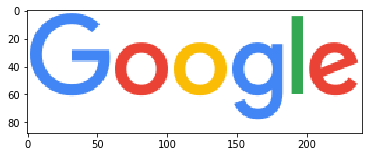

In [35]:
from urllib.request import urlopen 
import matplotlib.pyplot as plt

# create a file-like object from the url
f = urlopen("https://www.google.ru/images/branding/googlelogo/2x/googlelogo_color_120x44dp.png")

# read the image file in a numpy array
a = plt.imread(f)
plt.imshow(a)
plt.show()